In [2]:
!pip install mlxtend

In [3]:
!pip install str

In [4]:
!pip install PyICU

  Using cached pyicu-2.15.2.tar.gz (267 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [102 lines of output]
      (running 'icu-config --version')
      (running 'pkg-config --modversion icu-i18n')
      Traceback (most recent call last):
        File "<string>", line 89, in <module>
        File "<frozen os>", line 717, in __getitem__
      KeyError: 'ICU_VERSION'
      
      During handling of the above exception, another exception occurred:
      
      Traceback (most recent call last):
        File "<string>", line 92, in <module>
        File "<string>", line 19, in check_output
        File "C:\Users\ibrah\anaconda3\Lib\subprocess.py", line 472, in check_output
          return run(*popenargs, stdout=PIPE, timeout=timeout, check=True,
                 ~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                     **kwargs).stdout
                     ^^^^^^^^^
        File "C:\Users\ibrah\anaconda3\Lib\subprocess.py", 

In [38]:
!pip install arabic-reshaper python-bidi


   ---------------------------------------- 2/2 [arabic-reshaper]



In [39]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

import arabic_reshaper
from bidi.algorithm import get_display

from mlxtend.preprocessing import TransactionEncoder 
from mlxtend.frequent_patterns import apriori, association_rules

In [6]:
data = pd.read_excel("F:\courses\iti\ITI Power bi\Data Mining\day1\Egyptian_Grocery_Transactions.xlsx",header=None)


In [7]:
data.shape

(20, 1)

In [8]:
data.head(5)

,0
0,"سكر,لبن,شاي"
1,"فراخ,بطاطس"
2,"رز,فراخ"
3,"عسل,لحمة,رز,زبادي"
4,"بصل,رز,عدس"


In [9]:
data.columns=['items']

In [10]:
transactions = []

values = data['items'].values

for i in range(len(values)):
    transactions.append(values[i].split(","))

print(transactions)

[['سكر', 'لبن', 'شاي'], ['فراخ', 'بطاطس'], ['رز', 'فراخ'], ['عسل', 'لحمة', 'رز', 'زبادي'], ['بصل', 'رز', 'عدس'], ['شيبسي', 'فلفل', 'بيبسي', 'مياه'], ['فراخ', 'بطاطس', 'شيبسي'], ['طماطم', 'عدس', 'كورن فليكس'], ['عسل', 'مربة', 'زيت', 'عيش بلدي'], ['فراخ', 'مكرونة', 'شاي', 'كشري', 'سكر', 'سمنة'], ['عسل', 'عدس'], ['زيت', 'بيض', 'فول', 'مكرونة', 'صلصة', 'جبنة قريش'], ['شاي', 'عدس', 'عسل', 'زيت', 'بيبسي', 'بيض'], ['رز', 'عدس', 'كشري'], ['كشري', 'عيش بلدي'], ['لبن', 'بيبسي', 'مربة'], ['سكر', 'عيش بلدي', 'مكرونة'], ['بيبسي', 'زبادي', 'طعمية'], ['بيبسي', 'سكر', 'زيت', 'عدس', 'فول', 'بيض'], ['بيض', 'بيبسي', 'طعمية', 'سكر', 'سمنة', 'جبنة قريش']]


In [11]:
encoder = TransactionEncoder()

trans = encoder.fit_transform(transactions)

print(trans)

[[False False False False False False False False  True False  True False
  False False False False False False False False False False False  True
  False False False False]
 [False  True False False False False False False False False False False
  False False False False False False  True False False False False False
  False False False False]
 [False False False False False  True False False False False False False
  False False False False False False  True False False False False False
  False False False False]
 [False False False False False  True  True False False False False False
  False False False False  True False False False False False False False
   True False False False]
 [ True False False False False  True False False False False False False
  False False False  True False False False False False False False False
  False False False False]
 [False False  True False False False False False False False False  True
  False False False False False False False  True F

In [12]:
encoded = pd.DataFrame(data = trans, columns = encoder.columns_, dtype = int)
encoded.head(10)

,بصل,بطاطس,بيبسي,بيض,جبنة قريش,رز,زبادي,زيت,سكر,سمنة,...,فراخ,فلفل,فول,كشري,كورن فليكس,لبن,لحمة,مربة,مكرونة,مياه
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
6,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
9,0,0,0,0,0,0,0,0,1,1,...,1,0,0,1,0,0,0,0,1,0


In [24]:
support = apriori(encoded ,min_support=0.1,use_colnames=True)
support.sort_values(by='support' , ascending = False).head(5)

c:\Users\ibrah\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
1,0.30,(بيبسي)
12,0.30,(عدس)
7,0.25,(سكر)
6,0.20,(زيت)
13,0.20,(عسل)


In [53]:
confidence = association_rules(support, metric = 'confidence', min_threshold = 0.3)
confidence = confidence.sort_values(by = 'confidence', ascending = False)
confidence

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(بطاطس),(فراخ),0.1,0.20,0.1,1.000000,5.000000,1.0,0.080,inf,0.888889,0.500000,1.000000,0.750000
21,(فول),(بيض),0.1,0.20,0.1,1.000000,5.000000,1.0,0.080,inf,0.888889,0.500000,1.000000,0.750000
13,(جبنة قريش),(بيض),0.1,0.20,0.1,1.000000,5.000000,1.0,0.080,inf,0.888889,0.500000,1.000000,0.750000
9,(طعمية),(بيبسي),0.1,0.30,0.1,1.000000,3.333333,1.0,0.070,inf,0.777778,0.333333,1.000000,0.666667
76,"(زيت, بيبسي, عدس)",(بيض),0.1,0.20,0.1,1.000000,5.000000,1.0,0.080,inf,0.888889,0.500000,1.000000,0.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,(عدس),"(زيت, بيبسي)",0.3,0.10,0.1,0.333333,3.333333,1.0,0.070,1.350,1.000000,0.333333,0.259259,0.666667
67,(عدس),"(زيت, بيض)",0.3,0.15,0.1,0.333333,2.222222,1.0,0.055,1.275,0.785714,0.285714,0.215686,0.500000
60,(بيبسي),"(زيت, عدس)",0.3,0.10,0.1,0.333333,3.333333,1.0,0.070,1.350,1.000000,0.333333,0.259259,0.666667
86,(بيبسي),"(زيت, بيض, عدس)",0.3,0.10,0.1,0.333333,3.333333,1.0,0.070,1.350,1.000000,0.333333,0.259259,0.666667


In [54]:
confidence.describe().T

c:\Users\ibrah\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:4620: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,count,mean,std,min,25%,50%,75%,max
antecedent support,88.0,0.188636,0.074943,0.100000,0.100000,0.200000,0.25,0.30
consequent support,88.0,0.188636,0.074943,0.100000,0.100000,0.200000,0.25,0.30
support,88.0,0.102273,0.010475,0.100000,0.100000,0.100000,0.10,0.15
confidence,88.0,0.639962,0.263736,0.333333,0.400000,0.500000,1.00,1.00
lift,88.0,3.792298,1.787871,1.111111,2.430556,3.333333,5.00,10.00
representativity,88.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.00,1.00
leverage,88.0,0.068125,0.019067,0.010000,0.058750,0.070000,0.08,0.11
conviction,88.0,inf,NaN,1.050000,1.400000,1.800000,NaN,inf
zhangs_metric,88.0,0.816179,0.197769,0.142857,0.746324,0.888889,1.00,1.00
jaccard,88.0,0.416144,0.153722,0.200000,0.321429,0.366667,0.50,1.00


In [21]:
highest_2_lifts = confidence.nlargest(2,'lift')

smallest_2_lifts = confidence.nsmallest(2,'lift')

result = pd.concat([highest_2_lifts,smallest_2_lifts])
result.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
79,"(زيت, بيبسي)","(بيض, عدس)",0.1,0.1,0.1,1.000000,10.000000,1.0,0.09,inf,1.000000,1.0,1.000000,1.000000
82,"(بيض, عدس)","(زيت, بيبسي)",0.1,0.1,0.1,1.000000,10.000000,1.0,0.09,inf,1.000000,1.0,1.000000,1.000000
10,(بيبسي),(عدس),0.3,0.3,0.1,0.333333,1.111111,1.0,0.01,1.05,0.142857,0.2,0.047619,0.333333
11,(عدس),(بيبسي),0.3,0.3,0.1,0.333333,1.111111,1.0,0.01,1.05,0.142857,0.2,0.047619,0.333333


** as a weekest rules is interchangable between pepsi and aadss and it's axceptable association rules because it's more than 1 lift with high leverage leading to expecting items appear together more often than expected by chance with a conviction more than one on meanings that weak rules and that consequent is highly dependent on the antecedent.**

In [56]:
top_10 = confidence.sort_values(by='lift',ascending=False)
top_10 = top_10.head(10)

In [57]:
labels =  top_10['antecedents'].astype(str) + " + " + top_10['consequents'].astype(str)
ara_label = [get_display(arabic_reshaper.reshape(text)) for text in labels]
lift_score = top_10['lift']

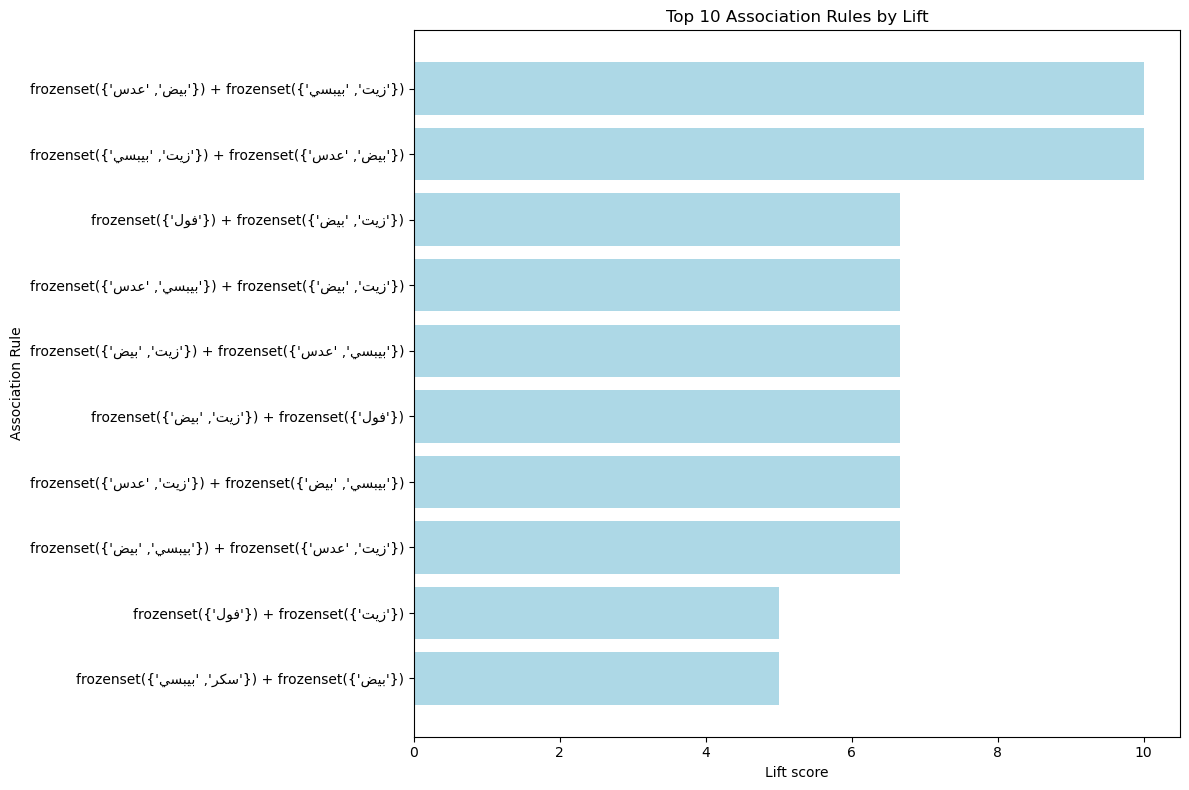

In [58]:
plt.figure(figsize=(12, 8))
plt.barh(ara_label, lift_score, color='lightblue')
plt.xlabel('Lift score')
plt.ylabel('Association Rule')
plt.title('Top 10 Association Rules by Lift')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()